In [17]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", color_codes= True)
import matplotlib.pyplot as plt

from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats

import xgboost as xgb

In [18]:
#Importing the data
train_data = pd.read_csv(r"C:\Users\skkav\Documents\Data Analytics\Python\Binary Prediction of Poisonous Mushrooms\train.csv", index_col='id')
test_data = pd.read_csv(r"C:\Users\skkav\Documents\Data Analytics\Python\Binary Prediction of Poisonous Mushrooms\test.csv", index_col='id')
sample_submission_data = pd.read_csv(r"C:\Users\skkav\Documents\Data Analytics\Python\Binary Prediction of Poisonous Mushrooms\sample_submission.csv", index_col='id')


In [19]:
#Understanding the data
print("Shape of train dataset: ", train_data.shape)
print("Shape of test dataset: ", test_data.shape)
print("Shape of sample submission: ", sample_submission_data.shape)

#Displaying the first 5 rows of the train and test dataset
print("Train dataset: ", train_data.head(5))
print("Test dataset: ", test_data.head(5))

Shape of train dataset:  (3116945, 21)
Shape of test dataset:  (2077964, 20)
Shape of sample submission:  (2077964, 1)
Train dataset:     class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
id                                                                            
0      e          8.80         f           s         u                    f   
1      p          4.51         x           h         o                    f   
2      e          6.94         f           s         b                    f   
3      e          3.88         f           y         g                    f   
4      e          5.85         x           l         w                    f   

   gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
id                                                       ...              
0                a            c          w         4.51  ...        NaN   
1                a            c          n         4.79  ...        NaN   
2          

In [20]:
#Since the dataset contains NaN values, checking their percentage
def null_percent(df):
    percentage = ((df.isnull().sum()/len(df))*100).round(2)
    return percentage

print("NaN values in train data: ", null_percent(train_data))
print("NaN values in test data: ", null_percent(test_data))

NaN values in train data:  class                    0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.53
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.81
gill-spacing            40.37
gill-color               0.00
stem-height              0.00
stem-width               0.00
stem-root               88.45
stem-surface            63.55
stem-color               0.00
veil-type               94.88
veil-color              87.94
has-ring                 0.00
ring-type                4.13
spore-print-color       91.43
habitat                  0.00
season                   0.00
dtype: float64
NaN values in test data:  cap-diameter             0.00
cap-shape                0.00
cap-surface             21.51
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.83
gill-spacing            40.40
gill-color               0.00
stem-height              0.00
stem-width               0.00
st

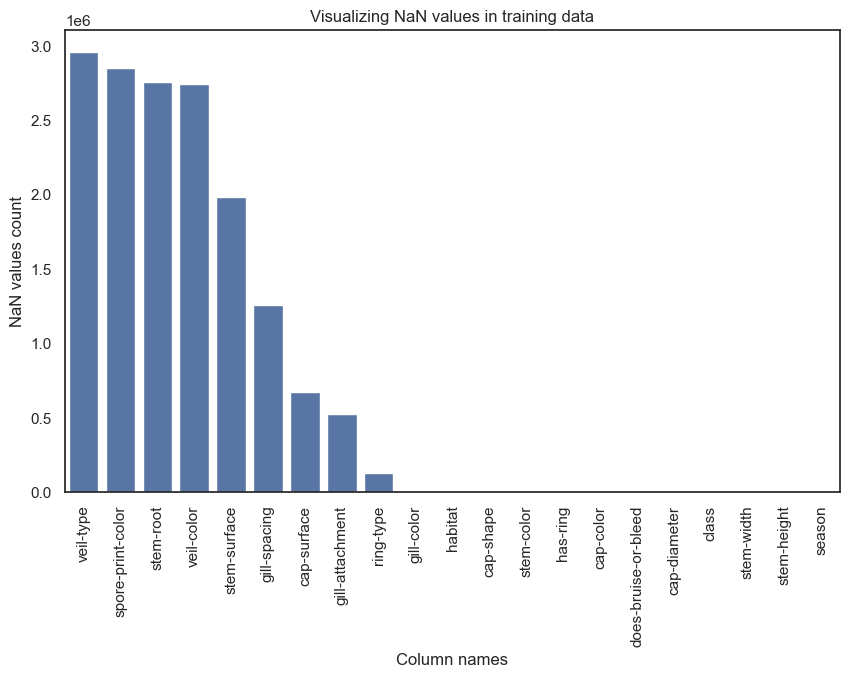

In [21]:
#Visualizing NaN values in train data
train_null_sum = train_data.isnull().sum()
train_null_sum = train_null_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = train_null_sum.index, y = train_null_sum.values)
plt.title("Visualizing NaN values in training data")
plt.xlabel("Column names")
plt.ylabel("NaN values count")
plt.xticks(rotation=90)
plt.show()

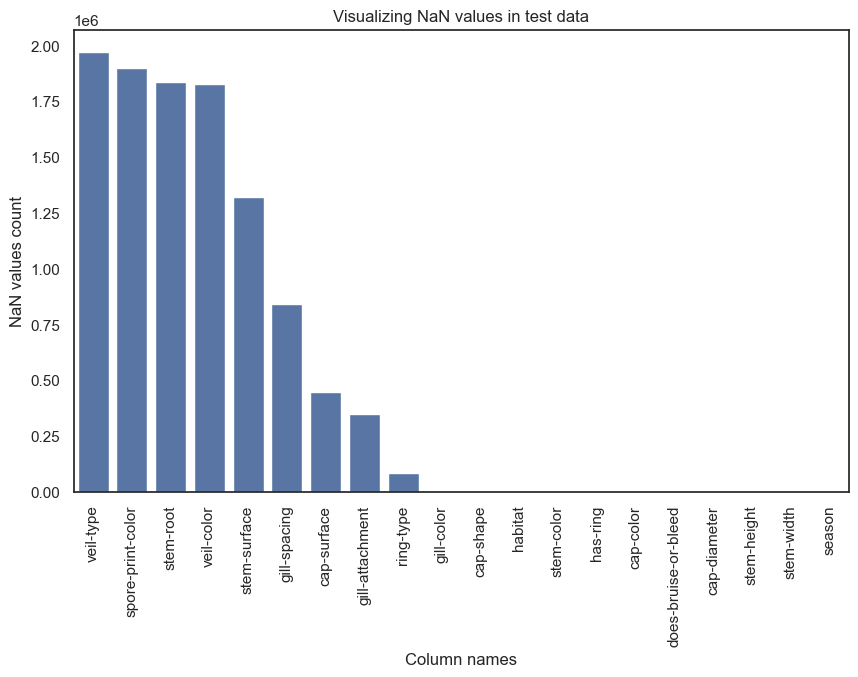

In [22]:
#Visualizing NaN values in test data
test_null_sum = test_data.isnull().sum()
test_null_sum = test_null_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = test_null_sum.index, y = test_null_sum.values)
plt.title("Visualizing NaN values in test data")
plt.xlabel("Column names")
plt.ylabel("NaN values count")
plt.xticks(rotation=90)
plt.show()

In [23]:
#Since the distribution of NaN values in the train and test data is similar, NaN values will be retained
train_duplicate = train_data.duplicated().sum()
test_duplicate = test_data.duplicated().sum()

print("Total duplicates in training data: ", train_duplicate)
print("Total duplicates in test data: ", test_duplicate)

Total duplicates in training data:  0
Total duplicates in test data:  0


In [24]:
#Encoding categorical columns
train_data['class'] = train_data['class'] == 'p'

encoder = TargetEncoder()
categorical_features = [val for val in train_data.drop(columns='class').select_dtypes(exclude='number').columns]
for feature in categorical_features:
    train_data[feature] = encoder.fit_transform(train_data[feature], train_data['class'])
    test_data[feature] = encoder.transform(test_data[feature])

In [25]:
#Outlier Analysis using Inter Quartile Range method
#Finding outliers in all numerical columns
def find_outliers_iqr(data):
    outliers = pd.DataFrame()

    for column in data.select_dtypes(include = [float, int]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Finding outliers
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound))
        return outliers

#Finding outliers in train data
train_outliers = find_outliers_iqr(train_data)
print('Train data\n', train_outliers)

#Finding outliers in test data
test_outliers = find_outliers_iqr(test_data)
print('Test data\n', test_outliers)

Train data
          cap-diameter
id                   
0               False
1               False
2               False
3               False
4               False
...               ...
3116940         False
3116941         False
3116942         False
3116943         False
3116944         False

[3116945 rows x 1 columns]
Test data
          cap-diameter
id                   
3116945         False
3116946         False
3116947         False
3116948         False
3116949         False
...               ...
5194904         False
5194905         False
5194906         False
5194907         False
5194908         False

[2077964 rows x 1 columns]


Data Visualization

<Axes: xlabel='stem-height', ylabel='stem-width'>

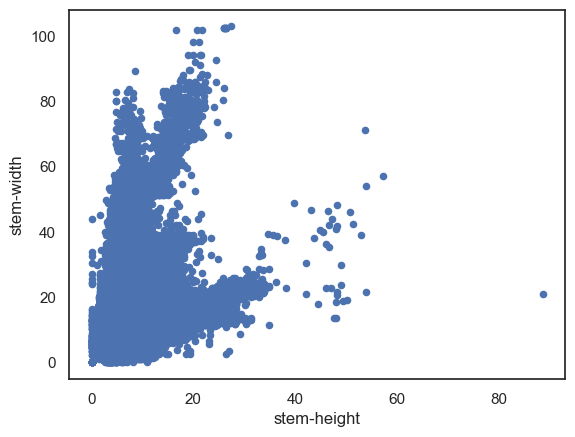

In [26]:
train_data.plot(kind='scatter', x='stem-height', y='stem-width')

<Axes: xlabel='stem-height', ylabel='stem-width'>

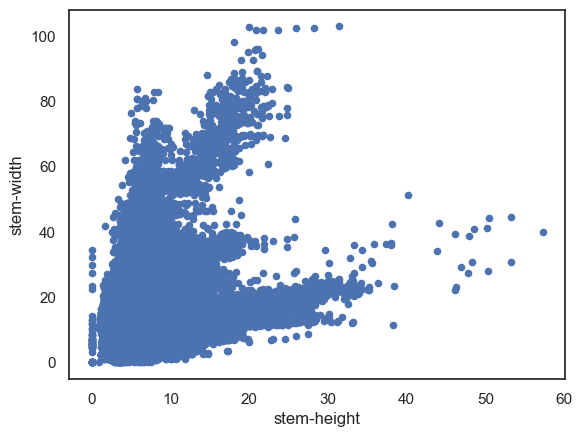

In [27]:
test_data.plot(kind='scatter', x='stem-height', y='stem-width')

<Axes: xlabel='cap-diameter', ylabel='stem-width'>

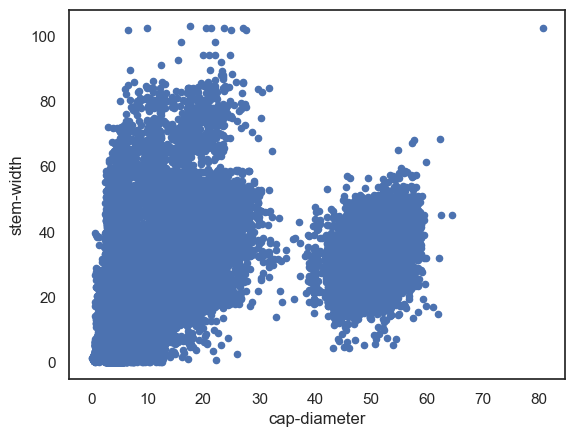

In [28]:
train_data.plot(kind='scatter', x='cap-diameter', y='stem-width')

<Axes: xlabel='cap-diameter', ylabel='stem-width'>

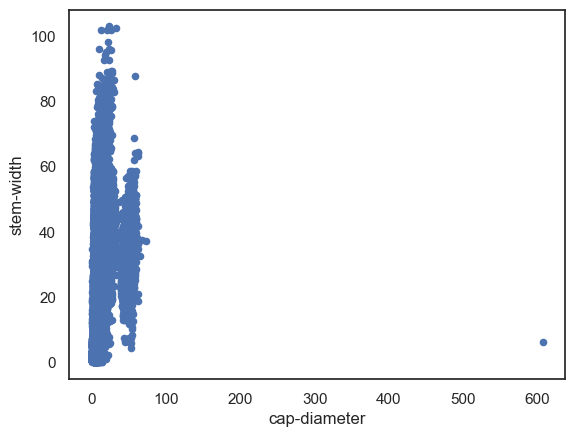

In [29]:
test_data.plot(kind='scatter', x='cap-diameter', y='stem-width')

<Axes: xlabel='stem-height', ylabel='cap-diameter'>

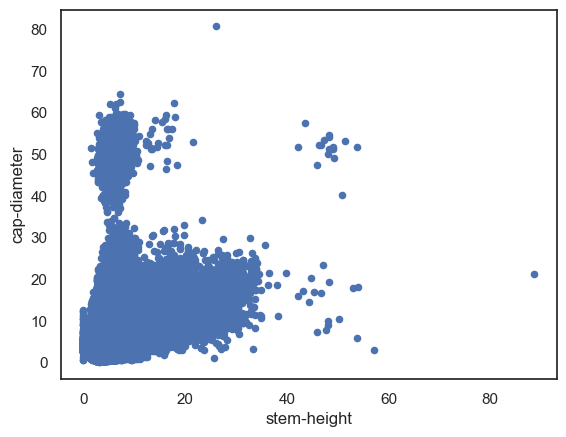

In [30]:
train_data.plot(kind='scatter', x='stem-height', y='cap-diameter')

<Axes: xlabel='stem-height', ylabel='cap-diameter'>

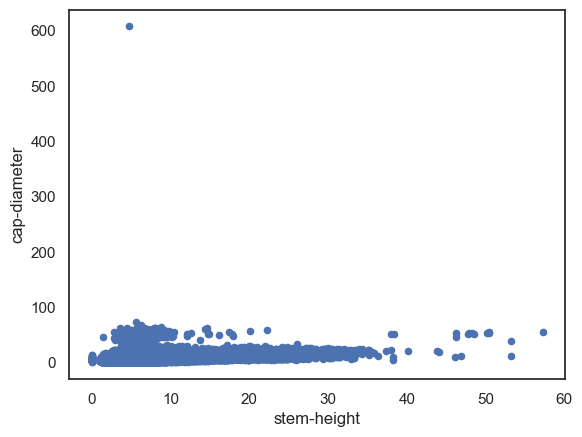

In [31]:
test_data.plot(kind='scatter', x='stem-height', y='cap-diameter')

In [32]:
#Split training data
X = train_data.drop(['class'], axis=1)
y = train_data['class']

In [34]:
#Using XGB Classifier for Prediction
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=5)

XGB_classifier = xgb.XGBClassifier(n_estimators = 100, max_depth = 6, learning_rate = 0.3, objective='binary:logistic', booster='gbtree', random_state=42, eval_metrics='logloss')

val_prediction = XGB_classifier.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose=True)

c:\Users\skkav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.54177
[1]	validation_0-logloss:0.44829
[2]	validation_0-logloss:0.38128
[3]	validation_0-logloss:0.34194
[4]	validation_0-logloss:0.30740
[5]	validation_0-logloss:0.28706
[6]	validation_0-logloss:0.25857
[7]	validation_0-logloss:0.24614
[8]	validation_0-logloss:0.22746
[9]	validation_0-logloss:0.21568
[10]	validation_0-logloss:0.20550
[11]	validation_0-logloss:0.19380
[12]	validation_0-logloss:0.17845
[13]	validation_0-logloss:0.16996
[14]	validation_0-logloss:0.16060
[15]	validation_0-logloss:0.14130
[16]	validation_0-logloss:0.13604
[17]	validation_0-logloss:0.12601
[18]	validation_0-logloss:0.12310
[19]	validation_0-logloss:0.11834
[20]	validation_0-logloss:0.11377
[21]	validation_0-logloss:0.11077
[22]	validation_0-logloss:0.10615
[23]	validation_0-logloss:0.10098
[24]	validation_0-logloss:0.09944
[25]	validation_0-logloss:0.09310
[26]	validation_0-logloss:0.09032
[27]	validation_0-logloss:0.08580
[28]	validation_0-logloss:0.07995
[29]	validation_0-loglos

In [35]:
test_prediction = XGB_classifier.predict(test_data)
sample_submission_data['class'] = test_prediction
sample_submission_data['class'] = sample_submission_data['class'].replace({1: 'p', 0: 'e'})
sample_submission_data.to_csv('XGBsubmission.csv')